## Step 4: Produce (semi-automated) plots of imaging and modelling results

Import some packages, create some folders. <br> Start this script in the target's main directory (workingdir+'/'+sourcetag) from Step 1.

In [38]:
import pickle
import matplotlib.pyplot as pl
import numpy as np
import os
import matplotlib

#Start from target's main directory from Step 1
os.chdir('/d1/boudica1/lmatra/GJ14')

#Read in directories as defined in step 1
miaopath, casapath, sourcetag, workingdir, vis, nvis = pickle.load(open('./dirvises.npy','rb'))

for i in ['analysis']:
    if not os.path.exists(workingdir+'/'+sourcetag+'/'+i):
        os.mkdir(workingdir+'/'+sourcetag+'/'+i)
!cp -r {miaopath}/utils/plotimage.py {workingdir}/{sourcetag}/analysis/.  
!cp -r {miaopath}/utils/imagecombo.py {workingdir}/{sourcetag}/analysis/. 

os.chdir('./analysis')

Check which image you want, either from original CLEAN images, or from later reweighted images

In [9]:
!ls ../imaging/*.fits
!ls ../uvfit/evaluation/*.fits

../imaging/GJ14_calibratedvis_cont_natural.fits
../imaging/GJ14_calibratedvis_cont_natural_pb.fits
../uvfit/evaluation/GJ14_calibratedvis_cont_0_model_natural.fits
../uvfit/evaluation/GJ14_calibratedvis_cont_0_model_natural_pb.fits
../uvfit/evaluation/GJ14_calibratedvis_cont_0_res_natural.fits
../uvfit/evaluation/GJ14_calibratedvis_cont_0_res_natural_pb.fits
../uvfit/evaluation/GJ14_calibratedvis_cont_0_rwdat_natural.fits
../uvfit/evaluation/GJ14_calibratedvis_cont_0_rwdat_natural_pb.fits


Check image you want, measure RMS **in mJy/beam** and input it below

In [8]:
%%script bash -s "$casapath" --bg
$1/casaviewer

Define inputs for plotting image

In [23]:
### List the final FITS image you want to plot. Remember, initial CLEAN image is in the imaging
#folder
data=workingdir+'/'+sourcetag+'/imaging/'+sourcetag+'_calibratedvis_cont_natural.fits'
# Otherwise, final dirty images are in the uvfit/evaluation folder:
#data=workingdir+'/'+sourcetag+'/uvfit/evaluation/'+sourcetag+'_calibratedvis_cont_natural.fits'

#Name of output plot
imageplotname=sourcetag+'_cont_natural.pdf'

#Distance of star from Earth in pc.
distobj=14.7
#RMS of noise level in mJy/beam - for creating contours with integer multiples of the noise level
rms=0.018
#This defines how zoomed in the image should be, in particular how many arcseconds you want half the image size to be.
halfimsizearcsec=12.0
#Name of the star for printing purposes
poslevs=[2,4,6,8,10,12,14,16,18,20,22,24,26,28,32]
neglevs=[-4,-2]
sizebarau=50.0
#If you need to saturate the image, set a different maximum value (vmax) to the colorscale:
vmax=None

Plot it!

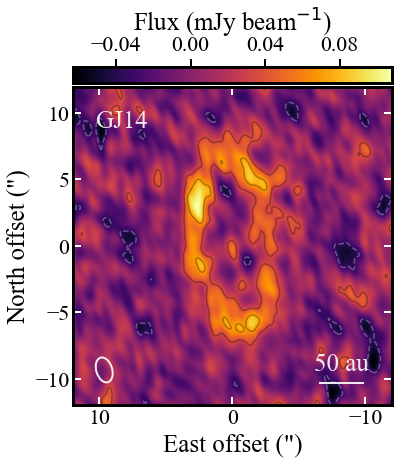

In [28]:
%run -i plotimage.py

Now create 'combo' plot with image, model, residuals and deprojected visibility profile.<br>
First define some inputs if needed

In [40]:
#Load model image and pixel size as created in postprocessing tutorial
modelim, pxsz = np.load(workingdir+'/'+sourcetag+'/uvfit/evaluation/'+sourcetag+'_material_modelim.npy', allow_pickle=True)

#Load residual FITS dirty image as created in postprocessing tutorial
residdata=workingdir+'/'+sourcetag+'/uvfit/evaluation/'+sourcetag+'_calibratedvis_cont_0_res_natural.fits' #Address of CLEANED FITS image

#Load deprojected visibility profile for data and imaged model
uvbins, uvbins_mod, bin_re, bin_re_err, bin_re_modfine, bin_im, bin_im_err, bin_im_modfine, ylimreal, ylimimag, maxuvdistklam = np.load(workingdir+'/'+sourcetag+'/uvfit/evaluation/'+sourcetag+'_material_uvplot.npy', allow_pickle=True)

#Define name for plot
imagecomboname=sourcetag+'_imagecombo.pdf'

Plot it!

***Processing PART 1: CLEANED IMAGE
***Processing PART 2: MODEL IMAGE
***Processing PART 3: RESIDUAL IMAGE
***Processing PART 4: VISIBILITY PROFILE


imagecombo.py:340: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig(imagecomboname)
imagecombo.py:340: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig(imagecomboname)
/d1/boudica1/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


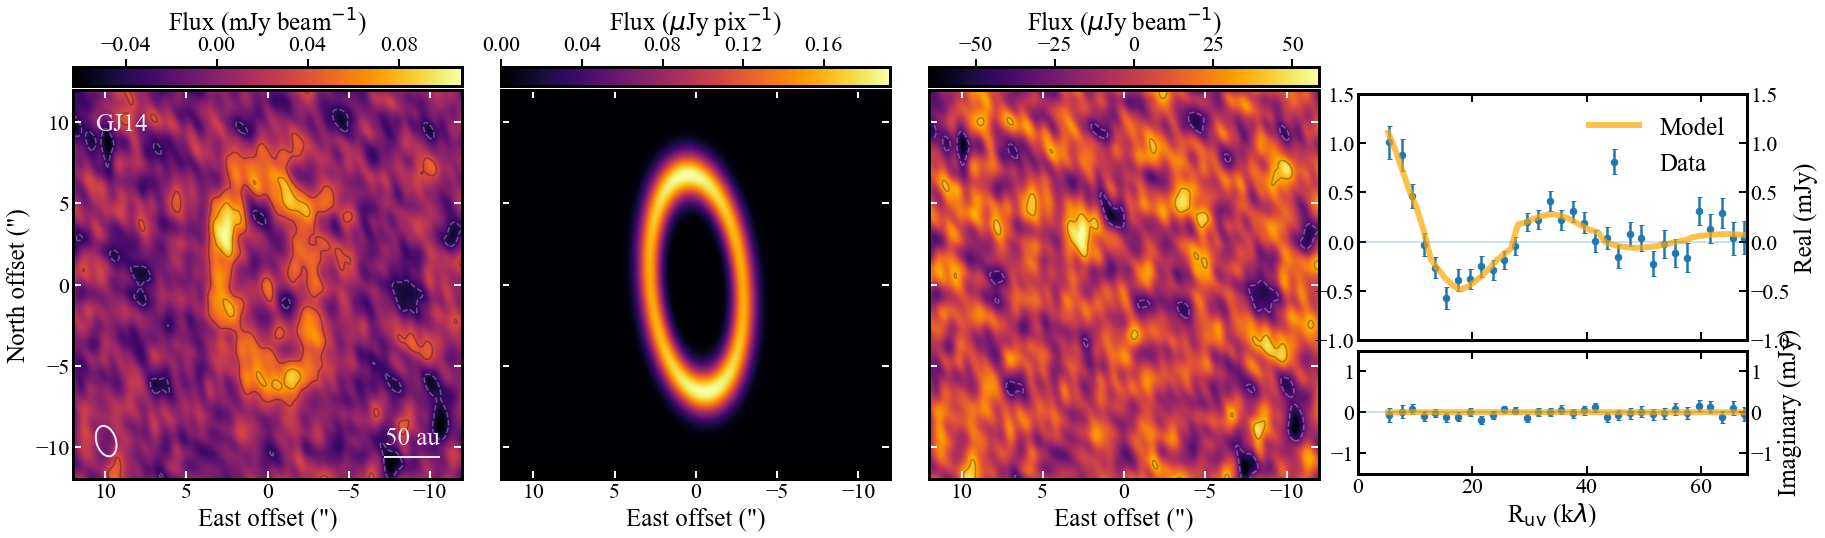

In [41]:
%run -i imagecombo.py

Done! :)